# Enunciado
Uma operadora de seguro de saúde identificou que as variáveis de peso e nível de colesterol influenciam no desenvolvimento de doenças card í acas. Pensando isso, faz se necessário identificar os perfis de pessoas com maior risco a saúde e delimitar os limites entre os grupos de risco.
A operadora de seguro de saúde identificou 4 grande grupos:
1. Alto Risco
2. Risco Moderado alto
3. Risco Moderado baixo
4. Baixo risco

> Para alcançar este objetivo, vamos utilizar o modelo agrupamento pelo algoritmo das K-Means.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.offline as po
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [ ]:
bas_estados = pd.read_csv('saude_estados.csv', sep = ';', encoding = 'latin-1')

In [ ]:
bas_clientes = pd.read_excel('saude_clientes.xlsx')

In [ ]:
bas_idades = pd.read_csv('saude_idade.csv', sep = ';', encoding = 'latin-1')

In [ ]:
bas_estados.head()
bas_estados.info()
bas_estados.describe()
bas_estados.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [ ]:
bas_clientes.head()
bas_clientes.info()
bas_clientes.describe()
bas_clientes.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id_cliente  547 non-null    int64 
 1   peso        547 non-null    int64 
 2   colesterol  547 non-null    int64 
 3   genero      547 non-null    object
 4   id_estado   547 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 21.5+ KB


id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [ ]:
bas_idades.head()
bas_idades.info()
bas_idades.describe()
bas_idades.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


id_cliente    0
idade         0
dtype: int64

# Opções para tratamento de nulos
1. Eliminação dos registros
2. Média dos valores (ex: média dos pesos dos clientes)
3. Mediana (valor central do grupo)

In [ ]:
# ver registros com valores nulos
bas_estados.loc[bas_estados['pais'].isnull()]

,id_estado,estado,sigla_estado,pais
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


In [ ]:
# elimina registros que contém null na coluna do dataframe
# para essa base é desnecessária, pois não há nenhum registros com o campo nulo
# bas_clientes.dropna(subset = ['peso'], inplace = True)

In [ ]:
print(f'Média: {bas_clientes.peso.mean():.1f} \nMediana: {bas_clientes.peso.median()}')

Média: 143.6 
Mediana: 140.0


In [ ]:
# preenche valores null com média
# para essa base é desnecessária, pois não há nenhum registros com o campo nulo
# bas_clientes.peso.fillna(round(bas_clientes.peso.mean(), 2), inplace = True)

In [ ]:
# preenche valores null com mediana
# para essa base é desnecessária, pois não há nenhum registros com o campo nulo
# bas_clientes.peso.fillna(round(bas_clientes.peso.median(), 2), inplace = True)

In [ ]:
print(bas_estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [ ]:
# preenche com 'Brasil' os registros com campo 'país' = nulo
bas_estados.pais.fillna('Brasil', inplace = True)

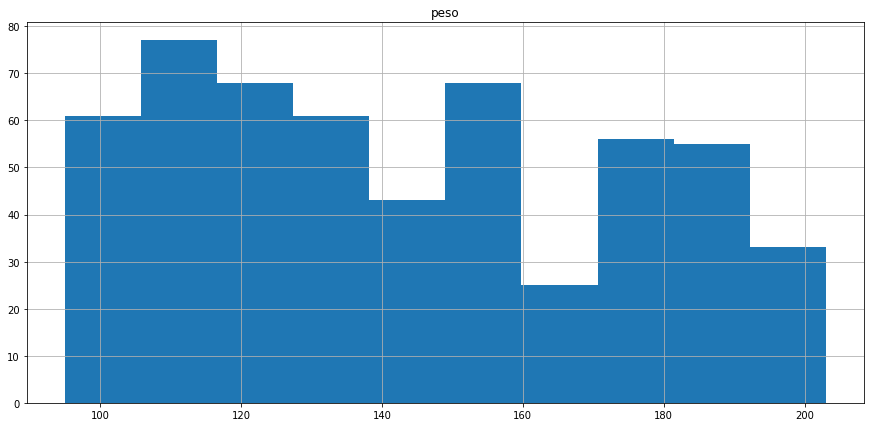

In [ ]:
bas_clientes.hist(column = 'peso', figsize = (15, 7))
plt.show()

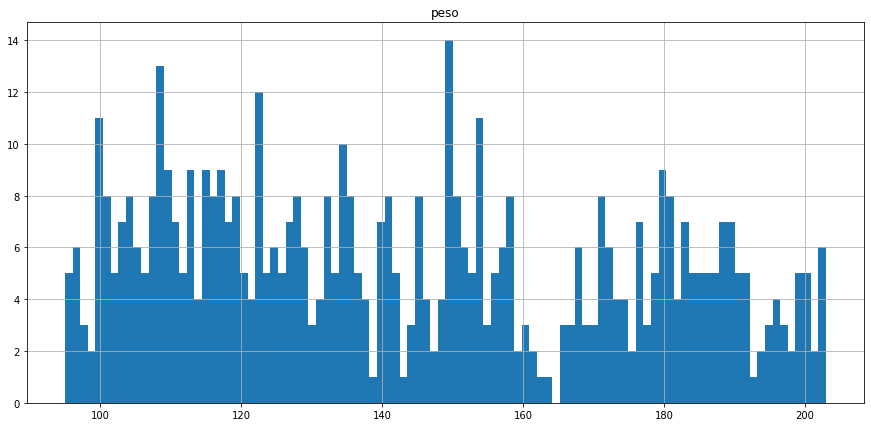

In [ ]:
bas_clientes.hist(column = 'peso', figsize = (15, 7), bins = 100)
plt.show()

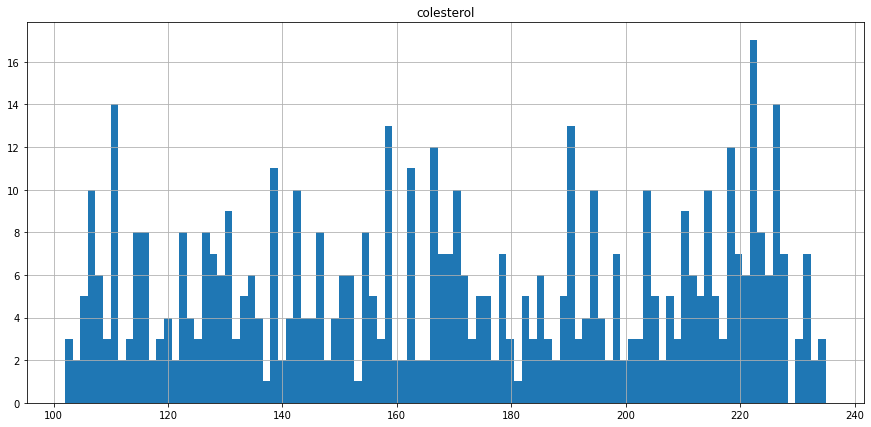

In [ ]:
bas_clientes.hist(column = 'colesterol', figsize = (15, 7), bins = 100)
plt.show()

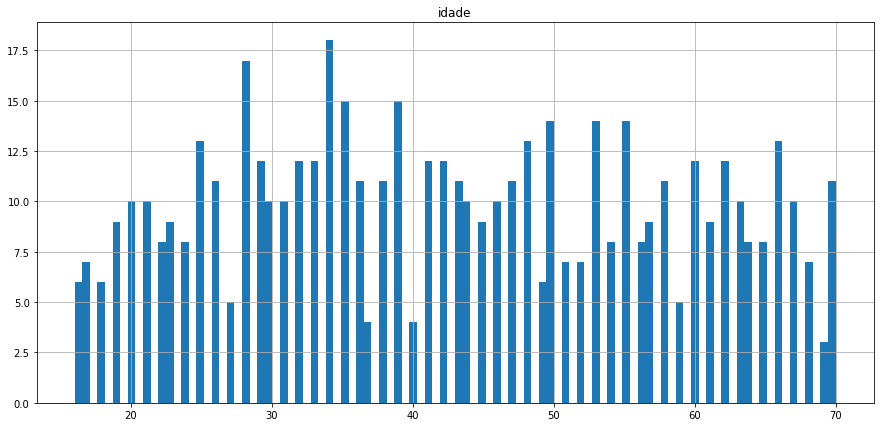

In [ ]:
bas_idades.hist(column = 'idade', figsize = (15, 7), bins = 100)
plt.show()

In [ ]:
le = LabelEncoder()
bas_clientes['genero_numerico'] = le.fit_transform(bas_clientes['genero'])

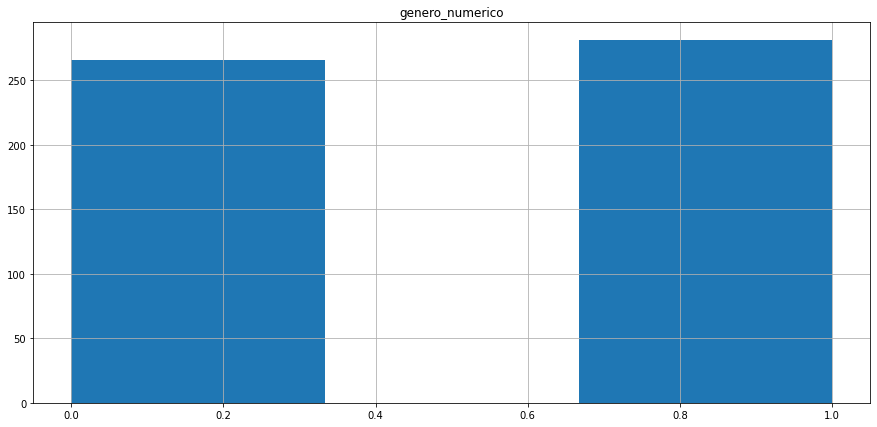

In [ ]:
bas_clientes.hist(column = 'genero_numerico', figsize = (15, 7), bins = 3)
plt.show()

In [ ]:
bas_merge = pd.merge(pd.merge(bas_clientes, bas_estados, on = 'id_estado'), bas_idades, on = 'id_cliente').sort_values('id_cliente')
bas_merge.reset_index(drop = True, inplace = True)
bas_merge.rename(columns = {'id_cliente': 'cod_cliente', 'genero_numerico' : 'cod_genero'}, inplace = True)
bas_merge['sigla_estado'] = bas_merge.sigla_estado.str.upper()

In [ ]:
bas_completa = bas_merge[['cod_cliente', 'genero', 'idade', 'peso', 'colesterol', 'id_estado', 'estado', 'sigla_estado', 'pais']]

In [ ]:
def calcular_wcss(dados):
  wcss = []
  for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(dados)
    wcss.append(km.inertia_)
  return wcss

In [ ]:
# bas_wcss = bas_completa[['peso', 'colesterol', 'idade']]
bas_wcss = bas_completa[['peso', 'colesterol']]
wcss_clientes = calcular_wcss(bas_wcss)

In [ ]:
gf = px.line(x = range(1, 11), y = wcss_clientes)
fg = go.Figure(gf)
fg.update_layout(title = 'Calculando o WCSS', xaxis_title = 'Número de clusters', yaxis_title = 'Valor do WCSS', template = 'plotly_white')
fg.show()

In [ ]:
n_clusters = 4
size = [7] * n_clusters
km_clientes = KMeans(n_clusters = n_clusters, random_state = 0)
bas_completa['cluster'] = km_clientes.fit_predict(bas_wcss)

In [ ]:
# São agrupados 4 (n_clusters = 4) grupos para cada atributo. Primeira coluna são os centróides de cada grupo por peso; a segunda por colesterol; e a terceira por idade!
centroides_clusters = km_clientes.cluster_centers_

In [ ]:
# gf1 = px.scatter(x = bas_completa['peso'], y = bas_completa['colesterol'], color = bas_completa['cluster'])
# gf2 = px.scatter(x = centroides_clusters[:, 0], y = centroides_clusters[:, 1], size = size)
# fg = go.Figure(data = gf1.data + gf2.data)
# fg.update_layout(title = 'Análise Colesterol/Peso (' + str(n_clusters) + ' grupos)', xaxis_title = 'Peso', yaxis_title = 'Colesterol', template = 'plotly_white')
# fg.show()

In [ ]:
def plotar_grafico(base, cent, x, y, color):
  gf1 = px.scatter(x = base[x], y = base[y], color = base[color])
  gf2 = px.scatter(x = cent[:, list(bas_wcss.columns).index(x)], y = cent[:, list(bas_wcss.columns).index(y)], size = size)
  fg = go.Figure(data = gf1.data + gf2.data)
  title = 'Análise ' + y.title() + '/' + x.title() + '(' + str(n_clusters) + ' grupos)'
  fg.update_layout(title = title, xaxis_title = x.title(), yaxis_title = y.title(), template = 'plotly_white')
  fg.show()

In [ ]:
plotar_grafico(bas_completa, centroides_clusters, 'peso', 'colesterol', 'cluster')

In [ ]:
plotar_grafico(bas_completa, centroides_clusters, 'colesterol', 'peso', 'cluster')

In [ ]:
# plotar_grafico(bas_completa, centroides_clusters, 'idade', 'colesterol', 'cluster')

ValueError: ignored

In [ ]:
# plotar_grafico(bas_completa, centroides_clusters, 'colesterol', 'idade', 'cluster')

ValueError: ignored

# Segmentar
Alto Risco; 
Risco Moderado alto; 
Risco Moderado baixo; 
Baixo risco; 


In [ ]:
idx = bas_completa.groupby(['cluster']).mean().sort_values('colesterol', ascending = False).index
bas_completa.loc[bas_completa['cluster'] == idx[0], 'cluster_nome'] = 'Alto Risco'
bas_completa.loc[bas_completa['cluster'] == idx[1], 'cluster_nome'] = 'Risco Moderado alto'
bas_completa.loc[bas_completa['cluster'] == idx[2], 'cluster_nome'] = 'Risco Moderado baixo'
bas_completa.loc[bas_completa['cluster'] == idx[3], 'cluster_nome'] = 'Baixo risco'

In [ ]:
bas_completa.groupby('cluster_nome')['idade'].describe()
bas_completa.groupby('cluster_nome')['colesterol'].describe()
bas_completa.groupby('cluster_nome')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster_nome,,,,,,,,
Alto Risco,154.0,218.915584,8.190502,204.0,212.25,220.0,225.00,235.0
Baixo risco,140.0,119.535714,10.138899,102.0,110.00,120.0,128.25,138.0
Risco Moderado alto,118.0,185.906780,9.949434,168.0,177.00,187.5,194.00,204.0
Risco Moderado baixo,135.0,154.385185,9.823050,138.0,145.50,155.0,163.00,171.0


In [ ]:
bas_completa.groupby(['cluster', 'cluster_nome'])['estado'].describe()

,,count,unique,top,freq
cluster,cluster_nome,,,,
0,Alto Risco,148,27,Distrito Federal,9
1,Risco Moderado baixo,141,27,Piauí,10
2,Risco Moderado alto,113,27,Minas Gerais,8
3,Baixo risco,145,27,Amazonas,11


In [ ]:
bas_completa.query('cluster == 1 & estado == "Piauí"')

,cod_cliente,genero,idade,peso,colesterol,id_estado,estado,sigla_estado,pais,cluster,cluster_nome
117,118,Masculino,48,118,143,18,Piauí,PI,Brasil,1,Risco Moderado baixo
160,161,Feminino,16,135,161,18,Piauí,PI,Brasil,1,Risco Moderado baixo
222,223,Feminino,24,144,169,18,Piauí,PI,Brasil,1,Risco Moderado baixo
253,254,Feminino,56,141,171,18,Piauí,PI,Brasil,1,Risco Moderado baixo
288,289,Masculino,41,125,159,18,Piauí,PI,Brasil,1,Risco Moderado baixo
310,311,Feminino,26,123,142,18,Piauí,PI,Brasil,1,Risco Moderado baixo
383,384,Feminino,17,131,162,18,Piauí,PI,Brasil,1,Risco Moderado baixo
390,391,Feminino,53,135,163,18,Piauí,PI,Brasil,1,Risco Moderado baixo
425,426,Feminino,42,123,146,18,Piauí,PI,Brasil,1,Risco Moderado baixo
510,511,Feminino,51,119,143,18,Piauí,PI,Brasil,1,Risco Moderado baixo


In [ ]:
bas_completa.groupby(['cluster_nome', 'genero'])['peso'].describe()

count        mean  ...    75%    max
cluster_nome         genero                        ...              
Alto Risco           Feminino    63.0  186.190476  ...  192.0  203.0
                     Masculino   91.0  183.021978  ...  189.5  203.0
Baixo risco          Feminino    64.0  108.203125  ...  113.0  118.0
                     Masculino   76.0  105.710526  ...  110.0  118.0
Risco Moderado alto  Feminino    66.0  152.000000  ...  157.0  169.0
                     Masculino   52.0  152.211538  ...  154.0  168.0
Risco Moderado baixo Feminino    73.0  129.438356  ...  135.0  142.0
                     Masculino   62.0  125.709677  ...  131.0  140.0

[8 rows x 8 columns]

In [ ]:
bas_completa.to_excel('classificacao_clientes.xlsx')